In [2]:
import pandas as pd
import webvtt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('President Trump Delivers the State of the Union Address.m4a_predictions.csv',)
df['timestamp'] = pd.to_timedelta(df['timestamp'])
df.head()

,timestamp,prediction
0,00:00:00,0.550294
1,00:00:00.500000,0.537413
2,00:00:01,0.566119
3,00:00:01.500000,0.548482
4,00:00:02,0.558821


In [20]:
start = []
end = []
text = []
for caption in webvtt.read('President Trump Delivers the State of the Union Address.en.vtt'):
    start.append(caption.start)
    end.append(caption.end)
    text.append(caption.text)
subtitle_df = pd.DataFrame({'start': start, 'end': end, 'text': text})
subtitle_df['start'] = pd.to_timedelta(subtitle_df['start'])
subtitle_df['end'] = pd.to_timedelta(subtitle_df['end'])

In [22]:
subtitle_df[subtitle_df['text'].str.contains('Applause')]

,start,end,text
6,00:00:10.900000,00:00:29.400000,States\n[Applause]
102,00:04:12.500000,00:04:57.829000,zhichen\n[Applause]
103,00:04:57.829000,00:04:57.839000,[Applause]\n
104,00:04:57.839000,00:05:01.339000,[Applause]\ngentlemen we salute you
120,00:05:29.490000,00:06:01.030000,planted that flag Buzz Aldrin\n[Applause]
246,00:11:30.240000,00:11:45.280000,in over half a century\n[Applause]
247,00:11:45.280000,00:11:45.290000,[Applause]\n
248,00:11:45.290000,00:11:48.259000,[Applause]\nafrican-american Hispanic American...
332,00:16:20.120000,00:16:44.530000,union is strong\n[Applause]
460,00:21:59.520000,00:22:27.610000,terrific Alice please\n[Applause]


In [28]:
df[(df['prediction']>=0) & (df['timestamp']<'00:00:30')].plot(kind='scatter')

In [31]:
df = df.set_index('timestamp')

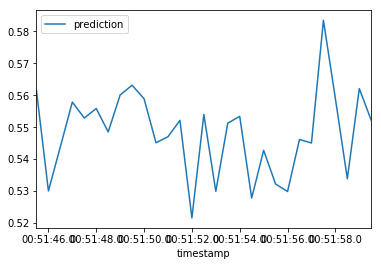

In [37]:
df[(df.index>'00:51:45') & (df.index<'00:52:00')].plot()